## Exercícios

### Problema: Análise de Dados de Vendas em uma Rede de Lojas

### Cenário:
Você é um cientista de dados trabalhando para uma rede de lojas de varejo. A empresa coletou dados de vendas de seus produtos em várias localidades durante o último ano. Seu objetivo é ajudar a empresa a entender melhor o desempenho das lojas, produtos mais vendidos e identificar tendências que podem auxiliar na criação de estratégias de vendas para o próximo ano.

    
### Teremos que criar esse conjunto de dados com as seguinetes informações:

 - ID_Produto	
 - Nome_Produto	
 - Categoria
 - Preço
 - Quantidade_Vendida
 - ID_Loja
 - Localidade_Loja	
 - Data_Venda

Esse dataset deverá conter 250 registros.
Bom trabalho.

In [33]:
!pip install pandas matplotlib

In [34]:
import numpy as np
import pandas as pd
import random
from datetime import date, timedelta
import matplotlib.pyplot as plt

# Definindo uma semente para garantir que os dados sejam reprodutíveis
np.random.seed(42)

n = 250
start_date, end_date = date(2024, 1, 1), date(2024, 12, 31)
produtos_nome = ['Tinta de Cabelo Colorido', 'Luva', 'Touca', 'Creme de Cabelo', 'Protetor Térmico', 'Descolorante']
produtos_cat = ["Convencional", "Profissional", "Semiprofissional"]
id_localidade = {
    1 : "São Paulo",
    2 : "Bauru",
    3 : "Campinas"
}

prod_ids = np.arange(1, n + 1)
prod_nome = np.random.choice (produtos_nome, size=n)
prod_cat = np.random.choice (produtos_cat, size=n)
preco = np.random.randint(10, 200, size=n)
qnt_vendida = np.random.randint(1, 500, size=n)

loja_ids = np.random.choice(list(id_localidade.keys()), size=n)
localidade = np.array([id_localidade[id_] for id_ in loja_ids])

dates_bet = end_date - start_date
total_days = dates_bet.days
randays = np.random.choice(total_days, n, replace=False)
dt_venda = [start_date + timedelta(days=int(day)) for day in randays]

# Combinando os dados em um array
dataset = np.column_stack((prod_ids, prod_nome, prod_cat, preco, qnt_vendida, localidade, loja_ids, dt_venda))

# Convertendo para DataFrame para visualização
df = pd.DataFrame(dataset, columns=['Produto ID', 'Produto Nome', 'Categoria', 'Preco', 'Qtd. Vendida','Localidade', 'Loja ID', 'DataVenda'])

# Exibindo o DataFrame
print(df)

#Transformar em array
#a=np.array(df)
#print(a)

    Produto ID      Produto Nome         Categoria Preco Qtd. Vendida  \
0            1   Creme de Cabelo  Semiprofissional    78          289   
1            2  Protetor Térmico  Semiprofissional   109          374   
2            3             Touca      Profissional    43           65   
3            4  Protetor Térmico  Semiprofissional   189          146   
4            5  Protetor Térmico  Semiprofissional   147          224   
..         ...               ...               ...   ...          ...   
245        246             Touca      Profissional    65          441   
246        247      Descolorante      Convencional    39          273   
247        248  Protetor Térmico  Semiprofissional   118          231   
248        249             Touca      Profissional    14           86   
249        250   Creme de Cabelo      Profissional   128          474   

    Localidade Loja ID   DataVenda  
0        Bauru       2  2024-06-08  
1    São Paulo       1  2024-08-24  
2    São Pau

 - Análise Exploratória:
    - Qual é o total de vendas por produto?

In [35]:
df ['Total Vendas'] = df['Qtd. Vendida']*df['Preco']
vendas_per_prod = df.groupby('Produto Nome')['Total Vendas'].sum()
print (vendas_per_prod)

Produto Nome
Creme de Cabelo             1472662
Descolorante                1153258
Luva                         726913
Protetor Térmico             828380
Tinta de Cabelo Colorido    1587738
Touca                        994252
Name: Total Vendas, dtype: object


    - Qual é a loja que vendeu mais produtos?

In [36]:
vendas_per_loja = df.groupby('Loja ID')['Total Vendas'].sum()
loja_sort = vendas_per_loja.sort_values (ascending=False)
print (loja_sort)

Loja ID
2    2602102
3    2124804
1    2036297
Name: Total Vendas, dtype: object


    - Qual categoria de produto teve mais vendas em termos de quantidade?

In [37]:
vendas_catg = df.groupby('Categoria')['Qtd. Vendida'].sum()
print(vendas_catg)

Categoria
Convencional        21909
Profissional        19731
Semiprofissional    18636
Name: Qtd. Vendida, dtype: object


 - Análise Temporal:
    - Identifique qual mês do ano teve mais vendas (quantidade) e qual mês gerou mais receita (valor total de vendas).

In [38]:
df['DataVenda'] = pd.to_datetime(df['DataVenda'], errors='coerce')
df['Mes'] = df['Mes'] = df['DataVenda'].dt.month
mes_venda = df.groupby('Mes')['Qtd. Vendida'].sum()
mes_venda_sort = mes_venda.sort_values(ascending=False)
print (mes_venda_sort)

Mes
7     6120
3     5761
10    5724
8     5566
1     5488
9     5407
11    5154
4     4563
5     4560
2     4520
12    4361
6     3052
Name: Qtd. Vendida, dtype: object


 - Agrupamento de Dados:
    - Agrupe os dados por categoria e calcule a média de vendas por produto dentro de cada categoria.
    - Quais produtos tiveram as melhores vendas em cada localidade?

In [39]:
df ['Total Vendas'] = df['Qtd. Vendida']*df['Preco']
vendas_catg = df.groupby('Categoria')['Total Vendas'].sum()
catg_qnt = df.groupby('Categoria')['Qtd. Vendida'].sum()
avg_catg = vendas_catg / catg_qnt
print (avg_catg)

Categoria
Convencional        105.033776
Profissional        113.328772
Semiprofissional     119.44237
dtype: object


In [40]:
df_local_venda = df.pivot_table(index='Loja ID', columns='Produto Nome', values='Qtd. Vendida', aggfunc='sum')
df_local_venda = df_local_venda.apply(pd.to_numeric, errors='coerce')
top_3 = df_local_venda.apply(lambda x: x.dropna().nlargest(3), axis=1)
print(top_3)

Produto Nome  Creme de Cabelo  Descolorante    Luva  Tinta de Cabelo Colorido  \
Loja ID                                                                         
1                      4319.0           NaN     NaN                    3720.0   
2                      6186.0        4006.0  3322.0                       NaN   
3                         NaN        3840.0     NaN                    5240.0   

Produto Nome   Touca  
Loja ID               
1             3559.0  
2                NaN  
3             4228.0  


 - Criação de Gráficos:
    - Crie gráficos de barras para visualizar as vendas por produto e por loja.
    - Crie um gráfico de linha para mostrar a evolução das vendas ao longo do tempo.

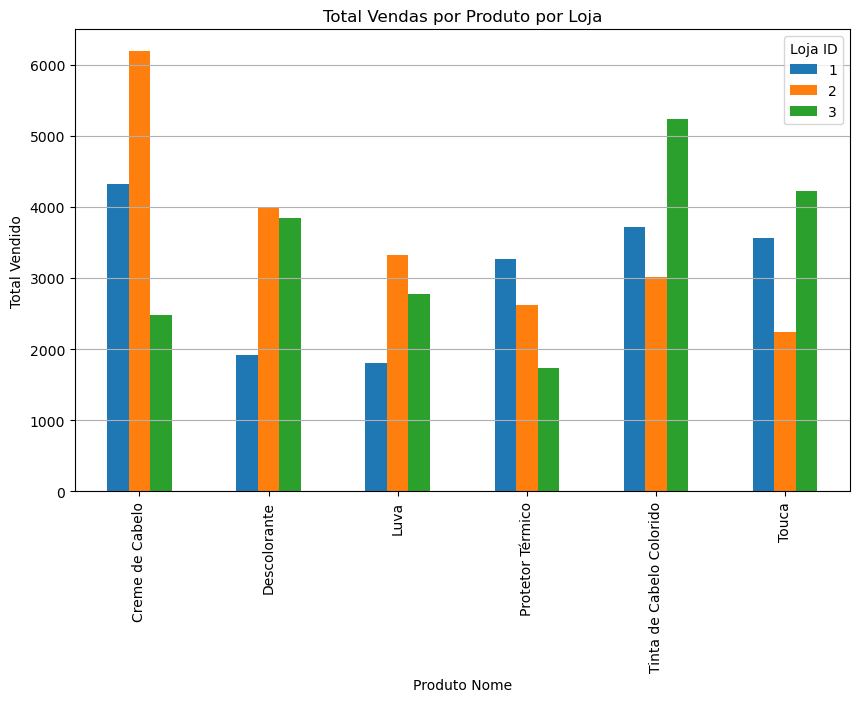

In [53]:
vendas_prod_loja = df.groupby(['Produto Nome', 'Loja ID'])['Qtd. Vendida'].sum().reset_index()
pivot_table = vendas_prod_loja.pivot(index='Produto Nome', columns='Loja ID', values='Qtd. Vendida')
pivot_table.plot(kind='bar', figsize=(10, 6))

plt.title('Total Vendas por Produto por Loja')
plt.xlabel('Produto Nome')
plt.ylabel('Total Vendido')
plt.legend(title='Loja ID')
plt.grid(axis='y')

plt.show()

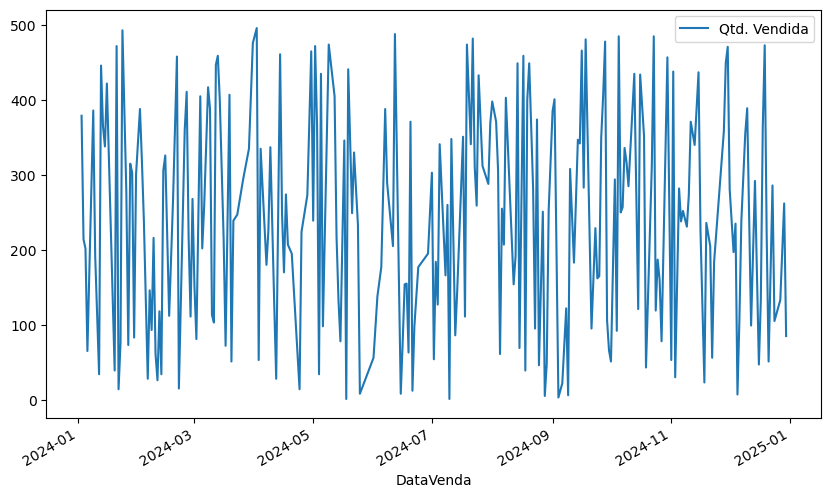

In [52]:
vendas_evol = df.groupby(['DataVenda'])['Qtd. Vendida'].sum().reset_index()
vendas_evol.plot(x='DataVenda', y='Qtd. Vendida', kind='line', figsize=(10, 6))
plt.show()